**Assignment 9**


1. Load in the data. The target column should be considered as whether a patient will develop heart disease or not.
2. Explore the data. Notice all columns are numerical. Therefore separate the continuous from the discrete features.
3. Identify any presence of outliers in the continuous features and resolve them using the IQR method.
4. Binned the continuous column values apart from the column ‘oldpeak’.
5. Separate the features from the labels and use the most appropriate feature selection technique(s).
6. Slice the data and scale the features.
7. Identify the data if the data is balanced. If not, sample the data using the most appropriate method keeping the size of the data in mind.
8. Using at least 4 classification methods, identify the best machine learning model using their training and testing accuracy scores.
9. Hyper parameter tune the best model using grid search to identify the best performing model.
10. Redefine the model instance based on the grid search results, train it and evaluate it using:
a. A classification report.
b. A visual representation and well labelled confusion matrix.
c. AUC score. (Explain the score in a markdown cell.)
d. ROC curve.
11. Based on the results on the ROC curve, which threshold would be ideal given the nature of the data? (Explain in a markdown cell.)
12. Save the model as ‘classification_model’.

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, plotly.express as px


In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
duplicate = df[df.duplicated()]
duplicate

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
df = df.drop_duplicates()
df.shape

(302, 14)

In [9]:
discrete = []
for item in df:
    if df[item].nunique() < 10:
        print(item, 'values:', df[item].unique())
        discrete.append(item)
        print('{} is discrete'.format(item))
    else:
        pass
    
discrete

sex values: [1 0]
sex is discrete
cp values: [3 2 1 0]
cp is discrete
fbs values: [1 0]
fbs is discrete
restecg values: [0 1 2]
restecg is discrete
exang values: [0 1]
exang is discrete
slope values: [0 2 1]
slope is discrete
ca values: [0 2 1 3 4]
ca is discrete
thal values: [1 2 3 0]
thal is discrete
target values: [1 0]
target is discrete


['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [10]:
continuous = [var for var in df if var not in discrete ]
continuous

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

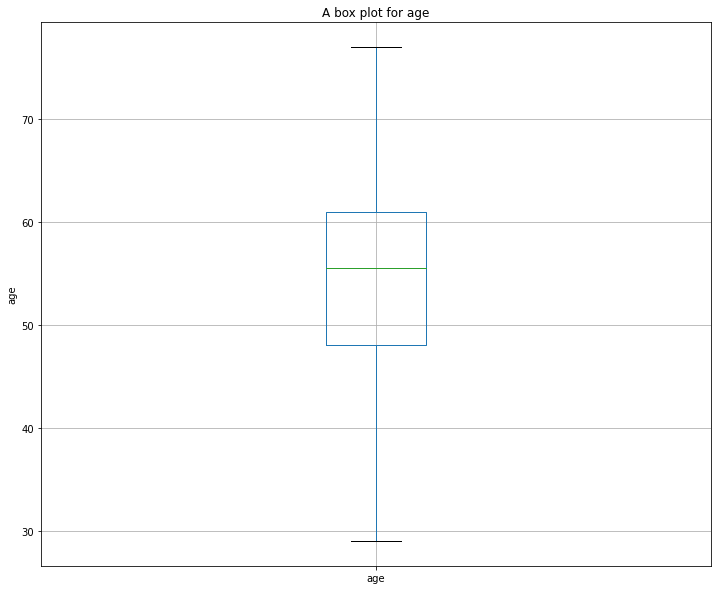

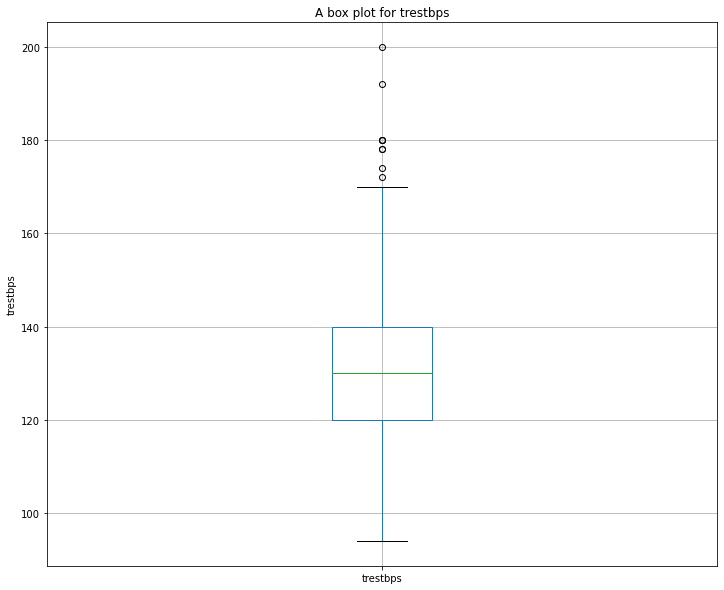

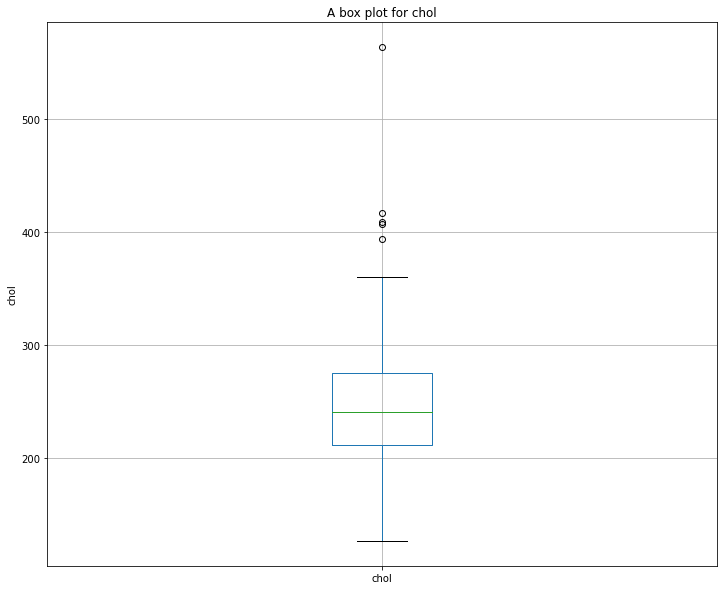

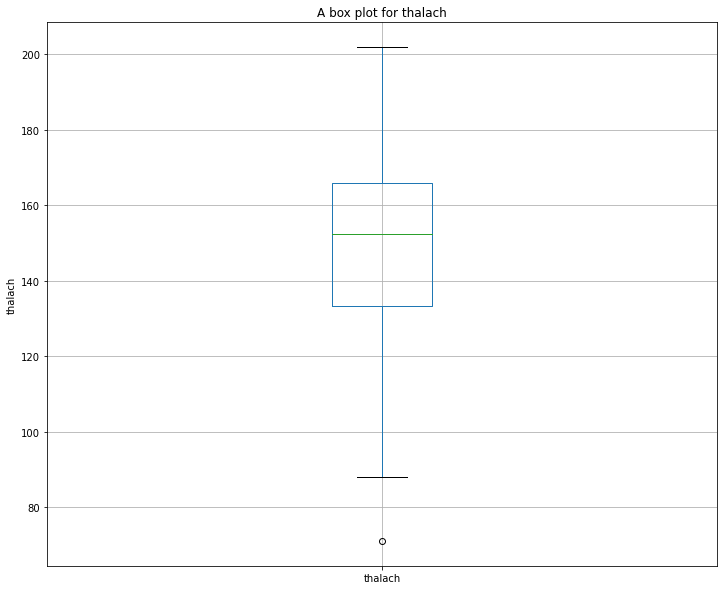

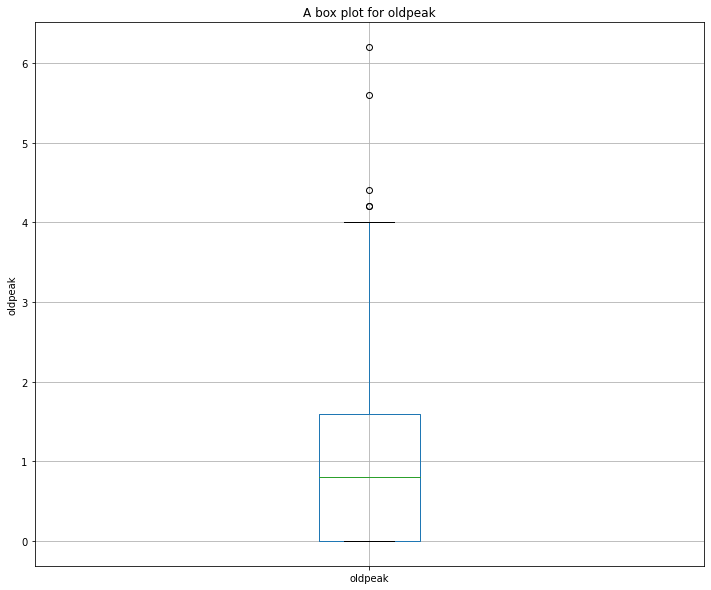

In [11]:
for var in continuous:
    plt.figure(figsize = (12,10))
    fig = df.boxplot(column = var)
    fig.set_title('A box plot for {}'.format(var))
    fig.set_ylabel(var)

In [12]:
continuous_with_outliers = []
for var in continuous[:]:
    if var != 'age':
        continuous_with_outliers.append(var)
continuous_with_outliers
        

['trestbps', 'chol', 'thalach', 'oldpeak']

In [13]:

Q1 = df.trestbps.quantile(0.25)
Q3 = df.trestbps.quantile(0.75)
trestbps_iqr = Q3 - Q1
trestbps_iqr

20.0

In [14]:
lower_limit = Q1 - trestbps_iqr*1.5
upper_limit = Q3+ trestbps_iqr*1.5
print(lower_limit)
print(upper_limit)

90.0
170.0


In [15]:
df[(df.trestbps< lower_limit)|(df.trestbps > upper_limit)].shape

(9, 14)

In [16]:
df_1o = df[(df.trestbps> lower_limit)&(df.trestbps < upper_limit)]
df_1o.shape

(289, 14)

<AxesSubplot:>

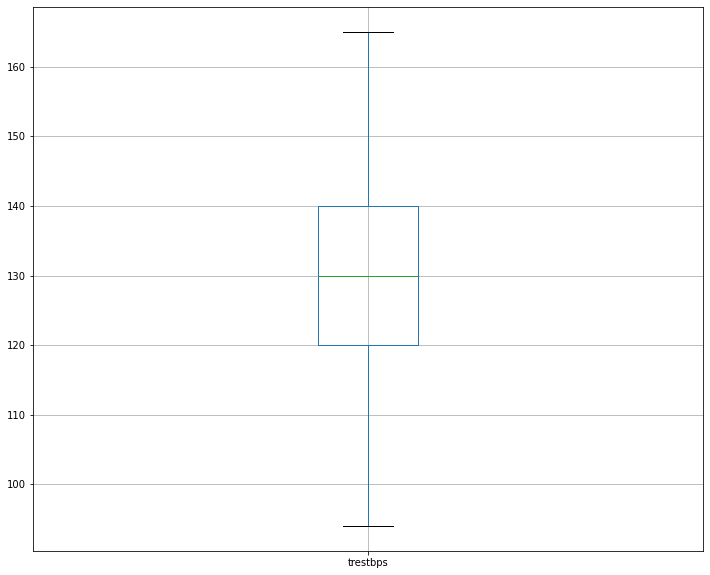

In [17]:
plt.figure(figsize = (12,10))
df_1o.boxplot(column = 'trestbps')

118.0
366.0
(284, 14)


<AxesSubplot:>

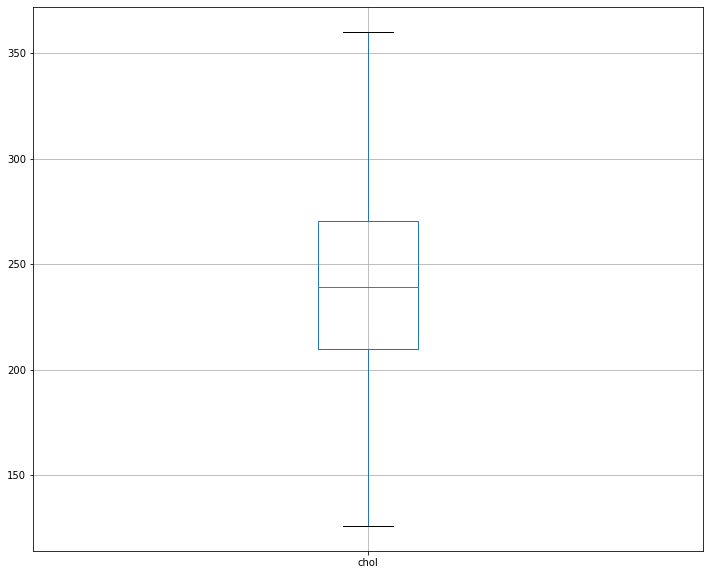

In [18]:
Q1 = df_1o.chol.quantile(0.25)
Q3 = df_1o.chol.quantile(0.75)
chol_iqr = Q3 - Q1
chol_iqr
lower_limit = Q1 - chol_iqr*1.5
upper_limit = Q3+ chol_iqr*1.5
print(lower_limit)
print(upper_limit)
df_1o[(df_1o.chol< lower_limit)|(df_1o.chol> upper_limit)].shape
df_2o = df_1o[(df_1o.chol> lower_limit)&(df_1o.chol < upper_limit)]
print(df_2o.shape)
plt.figure(figsize = (12,10))
df_2o.boxplot(column = 'chol')

78.0
222.0
(283, 14)


<AxesSubplot:>

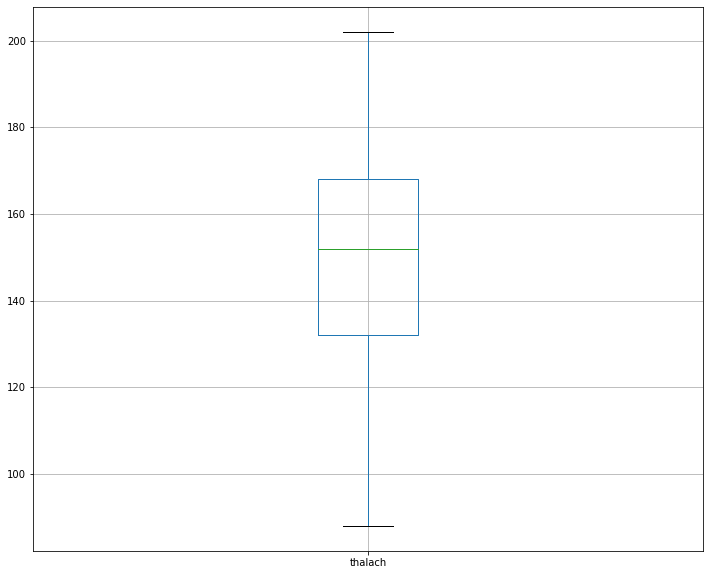

In [19]:
Q1 = df_2o.thalach.quantile(0.25)
Q3 = df_2o.thalach.quantile(0.75)
thalach_iqr = Q3 - Q1
thalach_iqr
lower_limit = Q1 - thalach_iqr*1.5
upper_limit = Q3+ thalach_iqr*1.5
print(lower_limit)
print(upper_limit)
df_2o[(df_2o.thalach< lower_limit)|(df_2o.thalach> upper_limit)].shape
df_3o = df_2o[(df_2o.thalach> lower_limit)&(df_2o.thalach < upper_limit)]
print(df_3o.shape)
plt.figure(figsize = (12,10))
df_3o.boxplot(column = 'thalach')

-2.4000000000000004
4.0
(278, 14)


<AxesSubplot:>

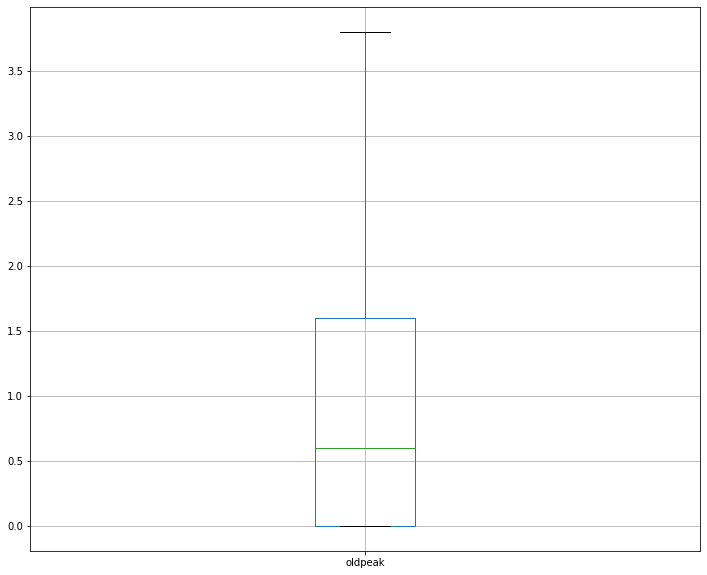

In [20]:
Q1 = df_3o.oldpeak.quantile(0.25)
Q3 = df_3o.oldpeak.quantile(0.75)
oldpeak_iqr = Q3 - Q1
oldpeak_iqr
lower_limit = Q1 - oldpeak_iqr*1.5
upper_limit = Q3+ oldpeak_iqr*1.5
print(lower_limit)
print(upper_limit)
df_3o[(df_3o.oldpeak< lower_limit)|(df_3o.oldpeak> upper_limit)].shape
df_no_outliers = df_3o[(df_3o.oldpeak> lower_limit)&(df_3o.oldpeak < upper_limit)]
print(df_no_outliers.shape)
plt.figure(figsize = (12,10))
df_no_outliers.boxplot(column = 'oldpeak')

In [21]:
df_no_outliers.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
df_new = df_no_outliers.copy()

In [23]:
continuous

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [24]:
continuous_to_bin = []
for var in continuous[:]:
    if var != 'oldpeak':
        continuous_to_bin.append(var)
continuous_to_bin
        

['age', 'trestbps', 'chol', 'thalach']

In [25]:
df_no_outliers.age.max(), df_no_outliers.age.min()

(77, 29)

In [26]:
age_range = []
for age in range (25,80,10):
    age_range.append('{0} - {1}'.format(age, age + 9.0))

df_new['age_range'] = pd.cut(x = df_new['age'], bins = 6, labels = age_range)
df_new.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_range
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,65 - 74.0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,25 - 34.0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,35 - 44.0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,55 - 64.0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,55 - 64.0


In [27]:
age_range

['25 - 34.0', '35 - 44.0', '45 - 54.0', '55 - 64.0', '65 - 74.0', '75 - 84.0']

In [28]:
df_no_outliers.trestbps.max(), df_no_outliers.trestbps.min()

(165, 94)

In [29]:
trestbps_range = []
for trestbps in range (90,170,10):
    trestbps_range.append('{0} - {1}'.format(trestbps, trestbps + 9.0))

df_new['trestbps_range'] = pd.cut(x = df_new['trestbps'], bins = 8, labels = trestbps_range)
df_new.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_range,trestbps_range
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,65 - 74.0,140 - 149.0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,25 - 34.0,130 - 139.0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,35 - 44.0,130 - 139.0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,55 - 64.0,110 - 119.0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,55 - 64.0,110 - 119.0


In [30]:
trestbps_range

['90 - 99.0',
 '100 - 109.0',
 '110 - 119.0',
 '120 - 129.0',
 '130 - 139.0',
 '140 - 149.0',
 '150 - 159.0',
 '160 - 169.0']

In [31]:
df_new.chol.max(), df_no_outliers.chol.min()

(360, 126)

In [32]:
chol_range = []
for chol in range (85,205,10):
    chol_range.append('{0} - {1}'.format(chol, chol + 9.0))
chol_range

['85 - 94.0',
 '95 - 104.0',
 '105 - 114.0',
 '115 - 124.0',
 '125 - 134.0',
 '135 - 144.0',
 '145 - 154.0',
 '155 - 164.0',
 '165 - 174.0',
 '175 - 184.0',
 '185 - 194.0',
 '195 - 204.0']

In [33]:
chol_range = []
for chol in range (85,205,10):
    chol_range.append('{0} - {1}'.format(chol, chol + 9.0))

df_new['chol_range'] = pd.cut(x = df_new['chol'], bins = 12, labels = chol_range)  #thalach_range
df_new.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_range,trestbps_range,chol_range
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,65 - 74.0,140 - 149.0,135 - 144.0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,25 - 34.0,130 - 139.0,145 - 154.0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,35 - 44.0,130 - 139.0,115 - 124.0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,55 - 64.0,110 - 119.0,135 - 144.0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,55 - 64.0,110 - 119.0,195 - 204.0


In [34]:
 chol_range

['85 - 94.0',
 '95 - 104.0',
 '105 - 114.0',
 '115 - 124.0',
 '125 - 134.0',
 '135 - 144.0',
 '145 - 154.0',
 '155 - 164.0',
 '165 - 174.0',
 '175 - 184.0',
 '185 - 194.0',
 '195 - 204.0']

In [35]:
#age_hist.sort_values(by = 'age_range', ascending = True, inplace = True)

In [36]:
df_no_outliers.thalach.max(), df_no_outliers.thalach.min()

(202, 88)

In [37]:
thalach_range = []
for thalach in range (85,205,10):
    thalach_range.append('{0} - {1}'.format(thalach, thalach + 9.0))

df_new['thalach_range'] = pd.cut(x = df_new['thalach'], bins = 12, labels = thalach_range)  #thalach_range
df_new.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_range,trestbps_range,chol_range,thalach_range
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,65 - 74.0,140 - 149.0,135 - 144.0,145 - 154.0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,25 - 34.0,130 - 139.0,145 - 154.0,185 - 194.0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,35 - 44.0,130 - 139.0,115 - 124.0,165 - 174.0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,55 - 64.0,110 - 119.0,135 - 144.0,175 - 184.0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,55 - 64.0,110 - 119.0,195 - 204.0,155 - 164.0


In [38]:
thalach_range

['85 - 94.0',
 '95 - 104.0',
 '105 - 114.0',
 '115 - 124.0',
 '125 - 134.0',
 '135 - 144.0',
 '145 - 154.0',
 '155 - 164.0',
 '165 - 174.0',
 '175 - 184.0',
 '185 - 194.0',
 '195 - 204.0']

In [39]:
df_no_outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [40]:
df_new

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_range,trestbps_range,chol_range,thalach_range
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,65 - 74.0,140 - 149.0,135 - 144.0,145 - 154.0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,25 - 34.0,130 - 139.0,145 - 154.0,185 - 194.0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,35 - 44.0,130 - 139.0,115 - 124.0,165 - 174.0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,55 - 64.0,110 - 119.0,135 - 144.0,175 - 184.0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,55 - 64.0,110 - 119.0,195 - 204.0,155 - 164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0,55 - 64.0,140 - 149.0,135 - 144.0,115 - 124.0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0,35 - 44.0,100 - 109.0,155 - 164.0,125 - 134.0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0,65 - 74.0,140 - 149.0,115 - 124.0,135 - 144.0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0,55 - 64.0,130 - 139.0,85 - 94.0,105 - 114.0


**5. Separate the features from the labels and use the most appropriate feature selection technique(s).**

In [41]:
X = df_no_outliers.drop('target', axis = 1)
y = df_no_outliers['target']
X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


#from sklearn.linear_model import LassoCV
#import statsmodels.api as sm

feature selection by backward elimination

In [42]:

import statsmodels.api as sm
cols = list(X.columns)
pmax = 1
while(len(cols)>0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
    
selected_features = cols
selected_features

['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']

In [43]:
training_vars = [var for var in df_no_outliers.columns if var not in ['sex', 'cp', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']]
training_vars

['age', 'trestbps', 'chol', 'fbs', 'restecg', 'slope', 'target']

In [44]:
df_no_outliers1 = df_no_outliers.drop(['age', 'trestbps', 'chol', 'fbs', 'restecg', 'slope', 'target'], axis = 1)
df_no_outliers1.head(2)

,sex,cp,thalach,exang,oldpeak,ca,thal
0,1,3,150,0,2.3,0,1
1,1,2,187,0,3.5,0,2


In [45]:
X_1

,const,sex,cp,thalach,exang,oldpeak,ca,thal
0,1.0,1,3,150,0,2.3,0,1
1,1.0,1,2,187,0,3.5,0,2
2,1.0,0,1,172,0,1.4,0,2
3,1.0,1,1,178,0,0.8,0,2
4,1.0,0,0,163,1,0.6,0,2
...,...,...,...,...,...,...,...,...
298,1.0,0,0,123,1,0.2,0,3
299,1.0,1,3,132,0,1.2,0,3
300,1.0,1,0,141,0,3.4,2,3
301,1.0,1,0,115,1,1.2,1,3


In [46]:
df_no_outliers1['target'] = y
df_no_outliers1.head()

,sex,cp,thalach,exang,oldpeak,ca,thal,target
0,1,3,150,0,2.3,0,1,1
1,1,2,187,0,3.5,0,2,1
2,0,1,172,0,1.4,0,2,1
3,1,1,178,0,0.8,0,2,1
4,0,0,163,1,0.6,0,2,1


In [47]:
X1 = df_no_outliers1.drop('target', axis = 1)
y1 = df_no_outliers1['target']
X1.head()


,sex,cp,thalach,exang,oldpeak,ca,thal
0,1,3,150,0,2.3,0,1
1,1,2,187,0,3.5,0,2
2,0,1,172,0,1.4,0,2
3,1,1,178,0,0.8,0,2
4,0,0,163,1,0.6,0,2


In [48]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1 , test_size = 0.2, random_state = 100)

In [51]:
X_train.head()

,sex,cp,thalach,exang,oldpeak,ca,thal
206,1,0,142,1,1.2,1,3
31,1,0,140,0,0.4,0,3
86,1,2,151,0,1.0,1,3
117,1,3,162,0,1.9,0,3
294,1,0,144,1,2.8,0,1


In [52]:
X_train.describe()

,sex,cp,thalach,exang,oldpeak,ca,thal
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,0.693694,0.968468,150.792793,0.297297,0.965315,0.711712,2.324324
std,0.462000,1.021886,22.609259,0.458101,1.024547,0.992163,0.565400
min,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,136.250000,0.000000,0.000000,0.000000,2.000000
50%,1.000000,1.000000,153.500000,0.000000,0.750000,0.000000,2.000000
75%,1.000000,2.000000,169.000000,1.000000,1.600000,1.000000,3.000000
max,1.000000,3.000000,202.000000,1.000000,3.800000,4.000000,3.000000


In [53]:
X_train_ss = pd.DataFrame(StandardScaler().fit_transform(X_train), columns = X_train.columns)
X_train_ss.head()

,sex,cp,thalach,exang,oldpeak,ca,thal
0,0.664499,-0.949869,-0.389781,1.537412,0.229580,0.291222,1.197741
1,0.664499,-0.949869,-0.478440,-0.650444,-0.553018,-0.718955,1.197741
2,0.664499,1.011721,0.009185,-0.650444,0.033930,0.291222,1.197741
3,0.664499,1.992515,0.496811,-0.650444,0.914352,-0.718955,1.197741
4,0.664499,-0.949869,-0.301122,1.537412,1.794775,-0.718955,-2.347572


In [54]:
X_train_rs = pd.DataFrame(RobustScaler().fit_transform(X_train), columns = X_train.columns)
X_train_rs.head()

,sex,cp,thalach,exang,oldpeak,ca,thal
0,0.0,-0.5,-0.351145,1.0,0.28125,1.0,1.0
1,0.0,-0.5,-0.412214,0.0,-0.21875,0.0,1.0
2,0.0,0.5,-0.076336,0.0,0.15625,1.0,1.0
3,0.0,1.0,0.259542,0.0,0.71875,0.0,1.0
4,0.0,-0.5,-0.290076,1.0,1.28125,0.0,-1.0


In [55]:
X_train_mms = pd.DataFrame(MinMaxScaler().fit_transform(X_train), columns = X_train.columns)
X_train_mms.head()

,sex,cp,thalach,exang,oldpeak,ca,thal
0,1.0,0.000000,0.473684,1.0,0.315789,0.25,1.0
1,1.0,0.000000,0.456140,0.0,0.105263,0.00,1.0
2,1.0,0.666667,0.552632,0.0,0.263158,0.25,1.0
3,1.0,1.000000,0.649123,0.0,0.500000,0.00,1.0
4,1.0,0.000000,0.491228,1.0,0.736842,0.00,0.0


In [56]:
target_0 = df_no_outliers1[df_no_outliers1.target == 0].target.count()/df_no_outliers1.target.count()
target_1 = df_no_outliers1[df_no_outliers1.target == 1].target.count()/df_no_outliers1.target.count()
print(target_0)
print(target_1)

0.4352517985611511
0.564748201438849


In [57]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [58]:
oversample = SMOTE()
X_train_rs_over, y_train_over = oversample.fit_resample(X_train_rs, y_train)
print(Counter(y_train_over))

Counter({0: 126, 1: 126})


In [59]:
oversample = SMOTE()
X_train_ss_over, y_train_over = oversample.fit_resample(X_train_ss, y_train)
print(Counter(y_train_over))

Counter({0: 126, 1: 126})
